<a href="https://colab.research.google.com/github/apal9569/facial-expression/blob/master/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/My\ Drive

/content/drive/My Drive


In [2]:
cd facial_exp

/content/drive/My Drive/facial_exp


In [0]:
import pandas as pd
from PIL import Image
import numpy as np
import csv


In [4]:
train=pd.read_csv('train.csv')
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [5]:
train['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [0]:
labels=train['emotion']
images=train['pixels']

In [0]:
images=np.array(images)

In [0]:
def data(filename):
  images=[]
  labels=[]
  with open(filename,'r') as csv_file:
    csv_reader=csv.reader(csv_file)
    for i,line in enumerate(csv_reader):
      if i==0:
        continue
      labels.append(line[0])
      images.append(line[1])
    return labels,images
labels,images=data('train.csv')

In [0]:
def image_ext(labels,images):
  label=np.array(list(map(int,labels)))
  images_array=np.zeros(shape=(len(images),48,48))
  for i,row in enumerate(images):
    image=np.fromstring(row,dtype=int,sep=' ')
    image=np.reshape(image,(48,48))
    images_array[i]=image
  return label,images_array
final_labels, final_images=image_ext(labels,images)

In [0]:
from google.colab.patches import cv2_imshow

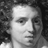

In [12]:
cv2_imshow(final_images[1000])

In [13]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
label=to_categorical(final_labels,7)
train_img,test_img,train_label,test_label=train_test_split(final_images,label,train_size=0.9,test_size=0.1,shuffle=True, random_state=42)

In [0]:
train_img = np.array(train_img,dtype=np.uint8).reshape(-1,48,48,1)
test_img = np.array(test_img,dtype=np.uint8).reshape(-1,48,48,1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        zca_epsilon=1e-06,  
        rotation_range=0,  

        width_shift_range=0.2,
        
        height_shift_range=0.2,
        shear_range=0.5,  
        zoom_range=0.5,  
        channel_shift_range=0., 
        
        fill_mode='nearest',
        cval=0.,  
        horizontal_flip=True,  
        vertical_flip=False,  
        
        rescale=None,
        
        preprocessing_function=None,
        
        data_format=None,
        
        validation_split=0.0)

datagen.fit(train_img)

In [0]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history_v2 = model.fit(train_img, train_label, 
          validation_data=(test_img, test_label),
          epochs=30, batch_size=128
        , verbose=1)


In [0]:
history=model.fit_generator(datagen.flow(train_img, train_label,
                                     batch_size=128),
                        epochs=20,
                        validation_data=(test_img,test_label),
                        workers=4)

In [0]:
classtype={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}

In [0]:
for i in range(20,30):
  cv2_imshow(test_img[i])
  p=model.predict(test_img[i].reshape(1,48,48,1))
  print(classtype[np.argmax(p)])

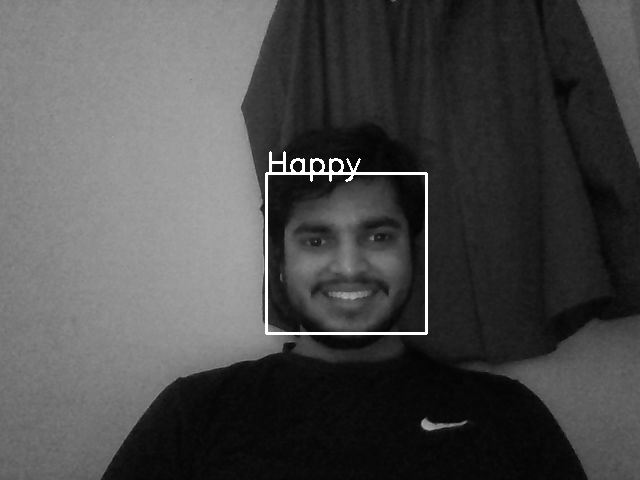

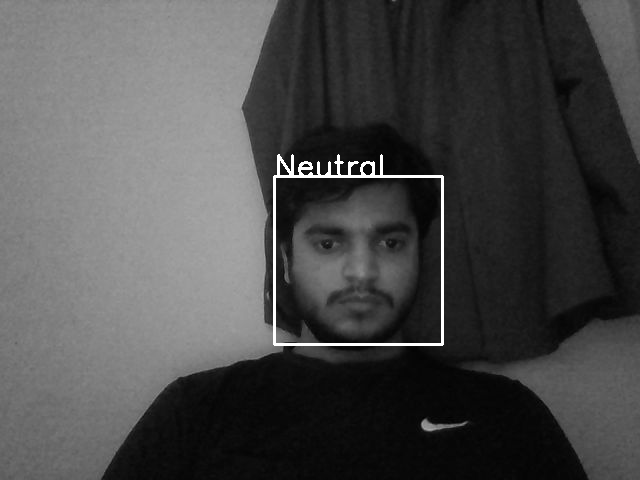

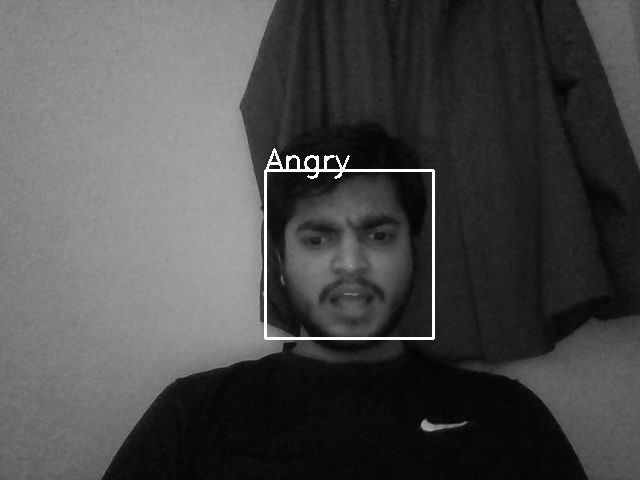

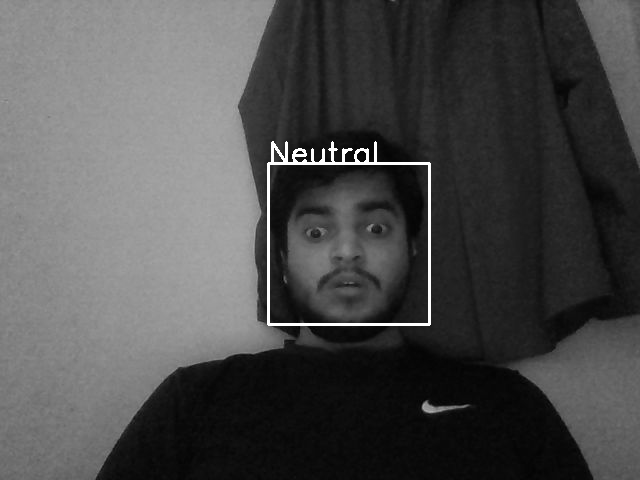

In [39]:
from glob import glob
import os
import cv2
facec = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
files = files=glob(os.path.join('*.jpg'))
for file in files:
  img=cv2.imread(file)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #gray_fr=cv2.resize(img,(48,48))
  faces = facec.detectMultiScale(img, 1.3, 5)

  for (x, y, w, h) in faces:
    pred_img = img[y:y+h, x:x+w]

    pred_img = cv2.resize(pred_img, (48, 48))
    pred_img=np.reshape(pred_img,(1,48,48,1))
    pred = model.predict(pred_img)

    cv2.putText(img, classtype[np.argmax(pred)], (x, y), font, 1, (255, 255, 0), 2)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2_imshow(img)
  